In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/home/ainhoa/Ficheros_Challenge_Data_Science/bookings.csv.bz2',header=0, sep='^', nrows=10000)
df.to_csv('/home/ainhoa/Ficheros_Challenge_Data_Science/bookings.sample2.csv.bz2', index=True)

In [2]:
df.shape

(10000, 38)

In [3]:
df.head(1)

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL


In [4]:
#Let's count how many rows has the file we are going to work with:
i = 0
import bz2
with bz2.open('/home/ainhoa/Ficheros_Challenge_Data_Science/bookings.csv.bz2') as f:
    for _ in f:
        i += 1
print(i)

10000011


TOP 10 ARRIVAL AIRPORTS IN THE WORLD IN 2013 (USING THE BOOKINGS FILE)

Arrival airport is the column arr_port. It is the IATA code for the airport. To get the total number of passengers for an airport, you can sum the column pax, grouping by arr_port.

Note that there is negative pax. That corresponds to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the canceled bookings).

In [5]:
#Let's examinate a sample of our data first:
sample = pd.read_csv('/home/ainhoa/Ficheros_Challenge_Data_Science/bookings.csv.bz2',header=0, sep='^', nrows=1000)

In [6]:
list(sample.columns)

['act_date           ',
 'source',
 'pos_ctry',
 'pos_iata',
 'pos_oid  ',
 'rloc          ',
 'cre_date           ',
 'duration',
 'distance',
 'dep_port',
 'dep_city',
 'dep_ctry',
 'arr_port',
 'arr_city',
 'arr_ctry',
 'lst_port',
 'lst_city',
 'lst_ctry',
 'brd_port',
 'brd_city',
 'brd_ctry',
 'off_port',
 'off_city',
 'off_ctry',
 'mkt_port',
 'mkt_city',
 'mkt_ctry',
 'intl',
 'route          ',
 'carrier',
 'bkg_class',
 'cab_class',
 'brd_time           ',
 'off_time           ',
 'pax',
 'year',
 'month',
 'oid      ']

In [7]:
import pandas as pd
import numpy as np
sample = pd.read_csv('/home/ainhoa/Ficheros_Challenge_Data_Science/bookings.csv.bz2',header=0, sep='^', nrows=10000)
sample.describe()

,duration,distance,intl,pax,year,month
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0
mean,20209.543000,455.563300,0.596300,0.516300,2013.0,3.0
std,42241.125937,1738.810081,0.490663,1.783943,0.0,0.0
min,59.000000,0.000000,0.000000,-25.000000,2013.0,3.0
25%,3339.000000,0.000000,0.000000,-1.000000,2013.0,3.0
50%,7734.500000,0.000000,1.000000,1.000000,2013.0,3.0
75%,19077.000000,0.000000,1.000000,1.000000,2013.0,3.0
max,488131.000000,18481.000000,1.000000,25.000000,2013.0,3.0


In [8]:
#Vamos a analizar si hay missing values:
sample.isnull().sum()

act_date               0
source                 0
pos_ctry               0
pos_iata               0
pos_oid                0
rloc                   0
cre_date               0
duration               0
distance               0
dep_port               0
dep_city               0
dep_ctry               0
arr_port               0
arr_city               0
arr_ctry               0
lst_port               0
lst_city               0
lst_ctry               0
brd_port               0
brd_city               0
brd_ctry               0
off_port               0
off_city               0
off_ctry               0
mkt_port               0
mkt_city               0
mkt_ctry               0
intl                   0
route                  0
carrier                0
bkg_class              0
cab_class              0
brd_time               0
off_time               0
pax                    0
year                   0
month                  0
oid                    0
dtype: int64

In [9]:
sample['oid      '].value_counts()

NULL         8428
SEAEX38AA      63
GOTFS2251      32
DELWI2202      24
BOSGC3100      21
LONS42200      18
RUHS93120      18
PAROP38AW      18
NYC1S21DD      17
PARG92500      15
SING42100      15
PARED38AA      14
RUHAA2136      14
EEN1S2102      13
BEROP38AW      13
MNLC3211B      12
LOSN82832      12
SCLQ12512      12
BCNI12186      12
AMSAA31AT      11
RUHAM3222      11
CGNON28YY      11
ATHGR28BF      11
MILED38EP      11
BKKIQ313C      11
KWIKT2260      10
ORNR9210A      10
VCEIG3173      10
SAN4B2C01      10
SJC1S212D       9
             ... 
DOHQR2251       1
CHCHF2100       1
MIACQ2100       1
WAWPQ211E       1
TIPLY2371       1
RTMAX2122       1
TLSWL2101       1
DFWS428AA       1
PARHX2655       1
ATHGR2180       1
MADTE2653       1
OSLNA28AM       1
HAJFF217K       1
FRULW2511       1
LISED38AA       1
BGOFS2262       1
MUCLW21VB       1
ATHGR2871       1
MRALY2102       1
SFO1S216B       1
MNLGM31IA       1
SIPU23503       1
SAN1S216X       1
ATHGR28BL       1
STOTK2431 

In [10]:
#If we want to launch all the columns:
pd.set_option('display.max_columns',None)
sample.head(3)

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHRZRH,LONZRH,CHGB,1,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,SAL,SAL,SV,CLT,CLT,US,CLTSAL,CLTSAL,SVUS,1,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLTSAL,CLTSAL,SVUS,1,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL


In [11]:
sample.dtypes

act_date               object
source                 object
pos_ctry               object
pos_iata               object
pos_oid                object
rloc                   object
cre_date               object
duration                int64
distance                int64
dep_port               object
dep_city               object
dep_ctry               object
arr_port               object
arr_city               object
arr_ctry               object
lst_port               object
lst_city               object
lst_ctry               object
brd_port               object
brd_city               object
brd_ctry               object
off_port               object
off_city               object
off_ctry               object
mkt_port               object
mkt_city               object
mkt_ctry               object
intl                    int64
route                  object
carrier                object
bkg_class              object
cab_class              object
brd_time               object
off_time  

In [12]:
#We are now only selecting the columns of interest:
s = pd.read_csv('/home/ainhoa/Ficheros_Challenge_Data_Science/bookings.sample.csv', header=0, sep='^', usecols=['arr_port','pax','year'], nrows=10000)
s.head()

,arr_port,pax,year
0,LHR,-1,2013
1,CLT,1,2013
2,CLT,1,2013
3,SVO,1,2013
4,SVO,1,2013


In [13]:
#If there were NaN (and we had decided not to take them into
#consideration), then we should drop them for our analysis:
s = s.dropna()

In [14]:
#We have to filter our data as we only want to analyze the year 2013:
s = s[s['year']==2013]
# And after filtering, we don't need the column 'year' anymore:
s.drop('year', axis=1, inplace=True)
s.head()

,arr_port,pax
0,LHR,-1
1,CLT,1
2,CLT,1
3,SVO,1
4,SVO,1


In [15]:
#As we want to find the top 10 airports (the ones that receive more passengers):
arr_ports = s.groupby('arr_port')
arr_ports.groups

{'AAL     ': Int64Index([4084, 4085], dtype='int64'),
 'ABQ     ': Int64Index([1606, 1607, 3341, 3342, 6023, 6024, 6025, 6026, 6464, 6465, 7517,
             7518],
            dtype='int64'),
 'ABV     ': Int64Index([3277, 3278, 4093, 4094, 7849, 7850], dtype='int64'),
 'ABZ     ': Int64Index([3483, 3484, 6062, 6063, 6064, 6065], dtype='int64'),
 'ACC     ': Int64Index([118, 119, 2512, 2513, 2514, 2515, 6164, 6165, 6888, 6889, 8695,
             8696],
            dtype='int64'),
 'ADD     ': Int64Index([207, 208, 301, 302, 2302, 2303, 3517, 3518, 3519, 3520, 5735, 5736,
             6216],
            dtype='int64'),
 'ADZ     ': Int64Index([8892, 8893], dtype='int64'),
 'AEP     ': Int64Index([1812, 2697, 2698, 2699, 2700, 2701, 2702, 2703, 2704, 3982, 3983,
             8402, 8403],
            dtype='int64'),
 'AER     ': Int64Index([1939, 2420, 2421], dtype='int64'),
 'AES     ': Int64Index([1701, 1702, 4999], dtype='int64'),
 'AFA     ': Int64Index([8412, 8413], dtype='int64'),


In [16]:
for airport, val in arr_ports:
    print(airport)
    print(val['pax'].sum())

AAL     
0
ABQ     
12
ABV     
2
ABZ     
-6
ACC     
4
ADD     
7
ADZ     
2
AEP     
7
AER     
1
AES     
3
AFA     
2
AGA     
0
AGP     
8
AGU     
4
AGX     
2
AJA     
7
AJF     
2
AKL     
2
ALA     
6
ALB     
2
ALC     
9
ALG     
26
AMD     
2
AMM     
16
AMS     
36
ANC     
4
ANF     
2
ANU     
0
AOE     
1
AOI     
0
AQP     
0
ARH     
1
ARN     
10
ASE     
2
ASU     
-10
ASW     
2
ATH     
36
ATL     
69
ATQ     
3
ATW     
3
AUA     
4
AUH     
5
AUS     
22
AVL     
2
AVP     
2
AXM     
0
AYT     
-6
BAH     
4
BBI     
0
BCD     
5
BCN     
46
BDA     
1
BDL     
1
BEG     
1
BEY     
10
BFN     
0
BGA     
-3
BGI     
10
BGO     
9
BHH     
1
BHM     
1
BHX     
10
BIO     
2
BIQ     
1
BJA     
2
BJV     
10
BJX     
12
BKI     
6
BKK     
24
BLJ     
-2
BLL     
2
BLQ     
7
BLR     
0
BME     
1
BNA     
10
BNE     
10
BOD     
2
BOG     
11
BOI     
11
BOM     
23
BOS     
46
BPS     
0
BQK     
0
BRC     
0
BRD     
2
BRE     
2
BRI     
2
BRM     
1
BRU  

In [17]:
#And here would be our top 10 airports in for our sample):
arr_ports.sum().sort_values('pax', ascending=False).head(10)

,pax
arr_port,
HKG,112
LGA,95
ORD,94
JFK,92
LAX,91
SFO,91
MCO,90
DCA,82
DEN,79


After having a quick look of our sample, we need to prepare our Big Data analysis for the whole population (10 million rows). We have chosen to use the panda's option called "chunks": it divides the population into pieces (we choose the size of the chunks)

In [18]:
import pandas as pd
bc = pd.read_csv('/home/ainhoa/Ficheros_Challenge_Data_Science/bookings.csv.bz2',sep='^', usecols=['dep_port','arr_port','pax', 'year'],chunksize=1000000)
sum_chunks=pd.DataFrame()

for i, b in enumerate(bc):
    print("Chunk: {}, size of chunk {}".format(i+1, len(b)))
    b=b.dropna()
    b=b[b['year']==2013]
    b.drop('year',axis=1, inplace=True)
    arr_ports=b.groupby('arr_port')
    chunk_result= arr_ports.sum()
    sum_chunks=sum_chunks.append(chunk_result)

Top_airports=sum_chunks.groupby(sum_chunks.index)\
    .pax.sum().sort_values(ascending=False).reset_index()

Chunk: 1, size of chunk 1000000
Chunk: 2, size of chunk 1000000
Chunk: 3, size of chunk 1000000
Chunk: 4, size of chunk 1000000
Chunk: 5, size of chunk 1000000
Chunk: 6, size of chunk 1000000
Chunk: 7, size of chunk 1000000
Chunk: 8, size of chunk 1000000
Chunk: 9, size of chunk 1000000
Chunk: 10, size of chunk 1000000
Chunk: 11, size of chunk 10


In [19]:
#Here are the top 10 airports in the big file:
Top_airports.head(10)

,arr_port,pax
0,LHR,88809.0
1,MCO,70930.0
2,LAX,70530.0
3,LAS,69630.0
4,JFK,66270.0
5,CDG,64490.0
6,BKK,59460.0
7,MIA,58150.0
8,SFO,58000.0
9,DXB,55590.0


As we can see, the results are not the same than when we analyzed the small sample...

Now, we want to know the names of these airports, but we don't have this info in our file! We are using the GeoBases project from Python to play with our data

In [20]:
from GeoBases import GeoBase
geoDict=GeoBase(data='ori_por',verbose=False)

In [21]:
geoDict.keys()[:10]

['AAA', 'AAA@1', 'AAB', 'AAC', 'AAC@1', 'AAE', 'AAE@1', 'AAF', 'AAF@1', 'AAG']

In [22]:
#Here we can see all the available fields that we can use:
geoDict.fields

['__key__',
 '__dup__',
 '__par__',
 '__lno__',
 'iata_code',
 'icao_code',
 'faa_code',
 'is_geonames',
 'geoname_id',
 'valid_id',
 'name',
 'asciiname',
 'lat',
 'lng',
 'fclass',
 'fcode',
 'page_rank',
 'date_from',
 'date_until',
 'comment',
 'country_code',
 'cc2',
 'country_name',
 'continent_name',
 'adm1_code',
 'adm1_name_utf',
 'adm1_name_ascii',
 'adm2_code',
 'adm2_name_utf',
 'adm2_name_ascii',
 'adm3_code',
 'adm4_code',
 'population',
 'elevation',
 'gtopo30',
 'timezone',
 'gmt_offset',
 'dst_offset',
 'raw_offset',
 'moddate',
 'city_code',
 'city_name_utf',
 'city_name_ascii',
 'tvl_por_list@raw',
 'tvl_por_list',
 'state_code',
 'location_type@raw',
 'location_type',
 'wiki_link',
 'alt_name_section@raw',
 'alt_name_section',
 '__gar__']

In [23]:
geoDict.get('LHR', 'city_name_utf')

'London'

In [24]:
geoDict.get('LHR','name')

'London Heathrow Airport'

In [25]:
Top_airports['arr_port'][0]

'LHR     '

In [26]:
#Now we add a column to our dataframe, containing the nameof the airport:
Top_airports['Airport Name']=Top_airports['arr_port'].\
map(lambda x: geoDict.get(x.strip())['name'])

In [27]:
#And we can see the top10 airports'names:
Top_airports.head(10)

,arr_port,pax,Airport Name
0,LHR,88809.0,London Heathrow Airport
1,MCO,70930.0,Orlando International Airport
2,LAX,70530.0,Los Angeles International Airport
3,LAS,69630.0,Mc Carran International Airport
4,JFK,66270.0,John F Kennedy International Airport
5,CDG,64490.0,Paris - Charles-de-Gaulle
6,BKK,59460.0,Suvarnabhumi
7,MIA,58150.0,Miami International Airport
8,SFO,58000.0,San Francisco International Airport
9,DXB,55590.0,Dubai International Airport


Now we would like to plot the airports, as we have their latitude and longitude we could use them as x and y axis in a scatterplot. Also, it couldbe cool to see the flights between these airports. Let's try!

In [28]:
#First, we are going to add two columns (latitude and longitude) to our Top_Airports dataframe:
Top_airports['lat']=Top_airports['arr_port'].\
map(lambda x: geoDict.get(x.strip())['lat'])
Top_airports['lng']=Top_airports['arr_port'].\
map(lambda x: geoDict.get(x.strip())['lng'])
Top_airports.head(3)

,arr_port,pax,Airport Name,lat,lng
0,LHR,88809.0,London Heathrow Airport,51.4775,-0.461389
1,MCO,70930.0,Orlando International Airport,28.429394,-81.308994
2,LAX,70530.0,Los Angeles International Airport,33.942536,-118.408075


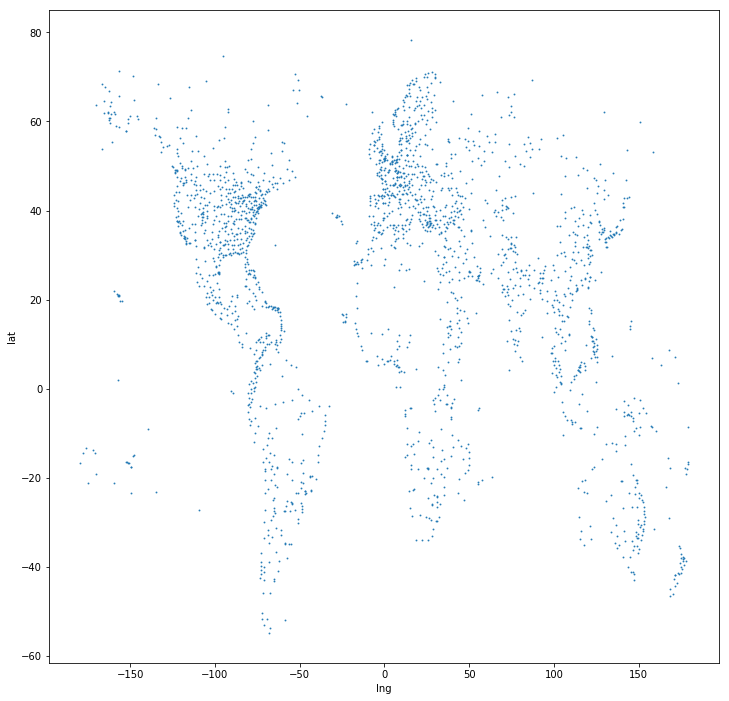

In [29]:
from matplotlib import pyplot as plt
%matplotlib inline
#We need to convert the coordinates into floats, as they're strings now:
Top_airports['lng'] = Top_airports['lng'].apply(pd.to_numeric)
Top_airports['lat'] = Top_airports['lat'].apply(pd.to_numeric)
Top_airports.plot(kind='scatter', x='lng', y='lat', alpha=0.9, figsize=(12, 12), s=0.8)

In order to be able to visualize the flights between each airport, we are going to create a new DataFrame in which we will group by each route (ie dep_port and arr_port). After, we will add with GeoBases the coordinates for both dept and arr and visualize

In [30]:
routes = pd.read_csv('/home/ainhoa/Ficheros_Challenge_Data_Science/bookings.csv.bz2',sep='^', usecols=['dep_port','arr_port',])

In [31]:
#We remove the unwanted spaces to be able to map after:
routes['dep_port'] = routes['dep_port'].str.strip()
routes['arr_port'] = routes['arr_port'].str.strip()

In [32]:
#In order to get the volume for each route, we need to count them:
routes['route_name'] = routes['dep_port'] + routes['arr_port']
routes.head(3)

,dep_port,arr_port,route_name
0,ZRH,LHR,ZRHLHR
1,SAL,CLT,SALCLT
2,SAL,CLT,SALCLT


In [33]:
#We will now use this route name to count how frequent is each one:
routes_total = routes.groupby('route_name').count()
routes_total.head(3)

,dep_port,arr_port
route_name,,
AABROV,40,40
AAEALG,580,580
AAEAMM,40,40


In [34]:
routes_total['route_name'] = routes_total.index
routes_total['volume'] = routes_total['dep_port']
routes_total.unstack()

          route_name
dep_port  AABROV         40
          AAEALG        580
          AAEAMM         40
          AAEBCN         60
          AAECDG         20
          AAEDXB         20
          AAEIST         40
          AAEMRS        160
          AAEORN         90
          AAEORY        160
          AALAGP         60
          AALAKL        160
          AALAMS         60
          AALARN         50
          AALAYT         60
          AALBCN         20
          AALBGO         60
          AALBHD         50
          AALBKI         30
          AALBKK        110
          AALBRU         80
          AALBSR         20
          AALCAN         40
          AALCGK         30
          AALCJU         80
          AALCPH        860
          AALDBV         60
          AALDEL         20
          AALEDI        100
          AALEZE         40
                       ... 
volume    ZYRGRU         20
          ZYRHAN         20
          ZYRHEL         40
          ZYRICN        100

In [35]:
flights = routes_total[['route_name', 'volume']].copy()
flights['dep_port'] = flights.route_name.apply(lambda x: x[:3])
flights['arr_port'] = flights.route_name.apply(lambda x: x[3:6])

In [36]:
import numpy as np
flights.reindex(np.arange(len(flights.index)))
flights.head(3)

,route_name,volume,dep_port,arr_port
route_name,,,,
AABROV,AABROV,40,AAB,ROV
AAEALG,AAEALG,580,AAE,ALG
AAEAMM,AAEAMM,40,AAE,AMM


In [37]:
#We deleted the rows which contained the value "JPS", as its not a correct IATA airport code
#and it was blocking our mapping after:
flights = flights[~flights.dep_port.str.contains("JPS")]
flights = flights[~flights.arr_port.str.contains("JPS")]

In [38]:
#Now, we add 4 columns for the coordinates:
flights['dep_lat']=flights['dep_port'].map(lambda x: geoDict.get(x.strip())['lat'])
flights['dep_lng']=flights['dep_port'].map(lambda x: geoDict.get(x.strip())['lng'])
flights['arr_lat']=flights['arr_port'].map(lambda x: geoDict.get(x.strip())['lat'])
flights['arr_lng']=flights['arr_port'].map(lambda x: geoDict.get(x.strip())['lng'])

In [39]:
flights.head()

,route_name,volume,dep_port,arr_port,dep_lat,dep_lng,arr_lat,arr_lng
route_name,,,,,,,,
AABROV,AABROV,40,AAB,ROV,-26.75,141,47.25821,39.81809
AAEALG,AAEALG,580,AAE,ALG,36.822225,7.809167,36.6985,3.20672
AAEAMM,AAEAMM,40,AAE,AMM,36.822225,7.809167,31.722556,35.993214
AAEBCN,AAEBCN,60,AAE,BCN,36.822225,7.809167,41.297078,2.078464
AAECDG,AAECDG,20,AAE,CDG,36.822225,7.809167,49.012779,2.55


In [40]:
flights = flights[['dep_lat','dep_lng','arr_lat','arr_lng','volume']]
flights.head()

,dep_lat,dep_lng,arr_lat,arr_lng,volume
route_name,,,,,
AABROV,-26.75,141,47.25821,39.81809,40
AAEALG,36.822225,7.809167,36.6985,3.20672,580
AAEAMM,36.822225,7.809167,31.722556,35.993214,40
AAEBCN,36.822225,7.809167,41.297078,2.078464,60
AAECDG,36.822225,7.809167,49.012779,2.55,20


In [41]:
#We need to convert the coordinates into floats, as they're strings for now:
flights['dep_lng'] = flights['dep_lng'].apply(pd.to_numeric)
flights['dep_lat'] = flights['dep_lat'].apply(pd.to_numeric)
flights['arr_lng'] = flights['arr_lng'].apply(pd.to_numeric)
flights['arr_lat'] = flights['arr_lat'].apply(pd.to_numeric)

There are obviously too many rows in our file (78K), which difficults the visualization. We will work only with the top 5K routes/flights by volume.

We want to plot our flights over a map of the world, using basemap. Please note I have
based this visualization on Hugo Larcher's blog https://blog.hugo-larcher.com:

/home/ainhoa/anaconda3/envs/kschool/lib/python3.7/site-packages/ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in greater


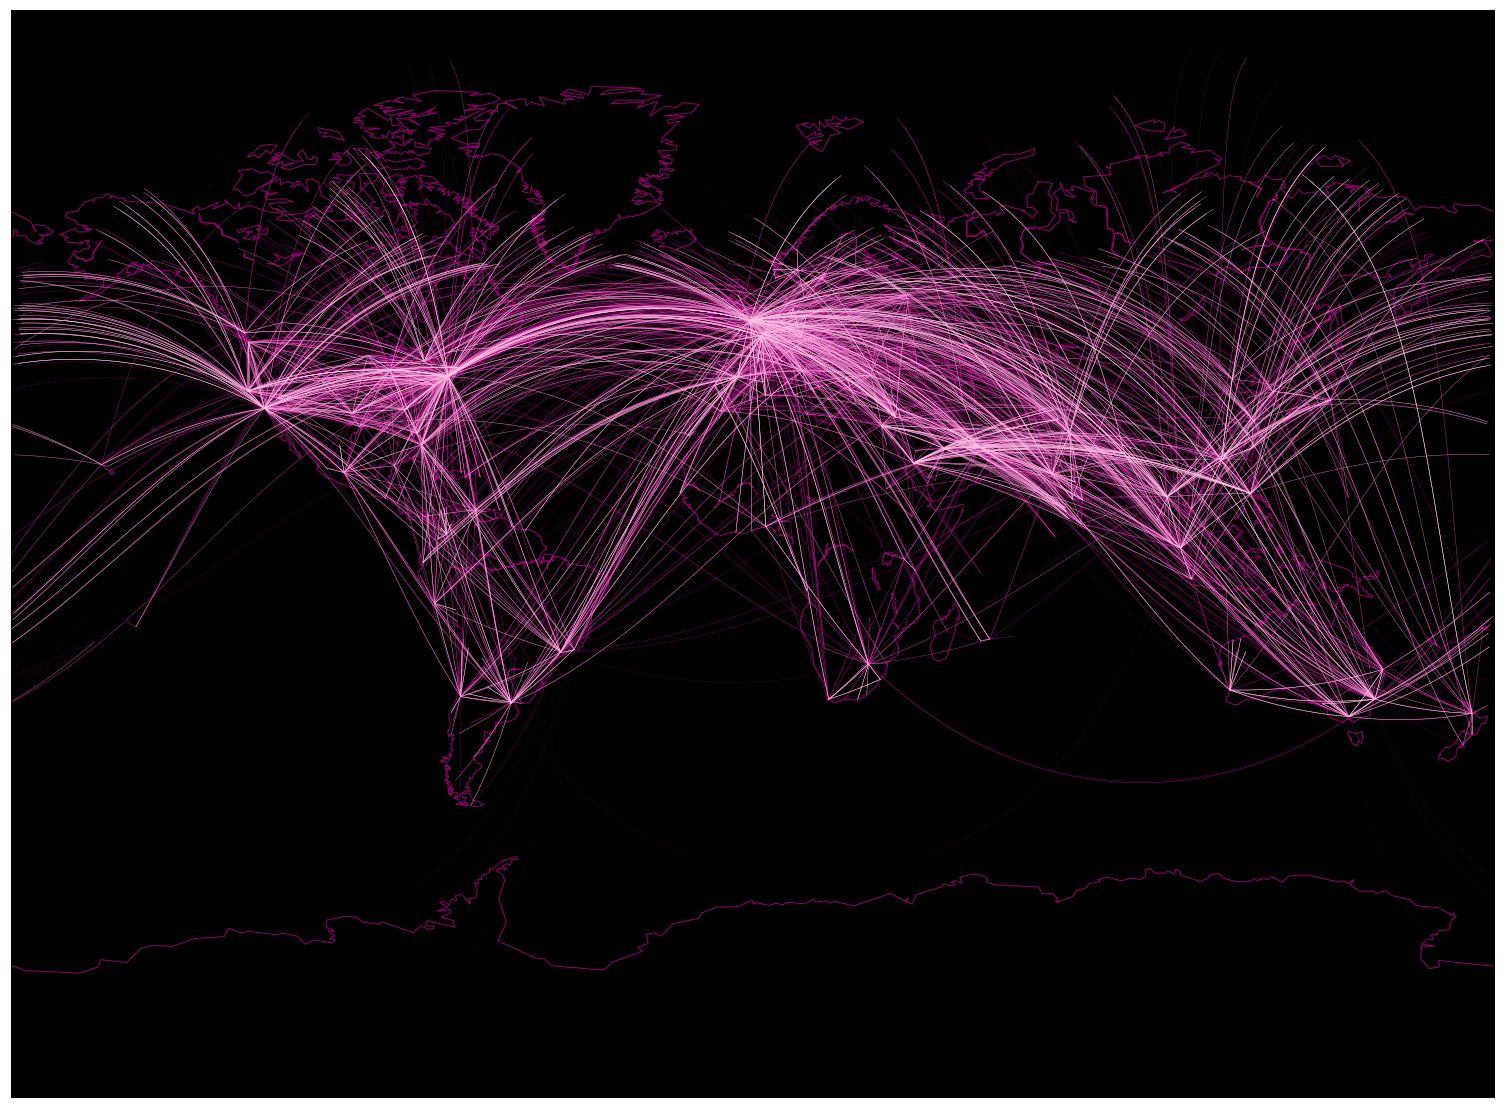

In [57]:
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap, PowerNorm

#For visualization purposes, we will take only the top 20.000 flights by volume:
a = flights.sort_values(by='volume', ascending=False)
top_flights = a[:5000]


def plot_map(in_filename, color_mode='screen',
             out_filename='flights_map_mpl.png', absolute=False):
    """Plots the given CSV data files use matplotlib basemap and saves it to
    a PNG file.
    Args:
        in_filename: Filename of the CSV containing the data points.
        out_filename: Output image filename
        color_mode: Use 'screen' if you intend to use the visualisation for
                    on screen display. Use 'print' to save the visualisation
                    with printer-friendly colors.
        absolute: set to True if you want coloring to depend on your dataset
                  parameter value (ie for comparison).
                  When set to false, each coordinate pair gets a different
                  color.
    """

    if color_mode == 'screen':
        bg_color = (0.0, 0.0, 0, 1.0)
        coast_color = (204/255.0, 0, 153/255.0, 0.7)
        color_list = [(0.0, 0.0, 0.0, 0.0),
                      (204/255.0, 0, 153/255.0, 0.6),
                      (255/255.0, 204/255.0, 230/255.0, 1.0)]
    else:
        bg_color = (1.0, 1.0, 1.0, 1.0)
        coast_color = (10.0/255.0, 10.0/255.0, 10/255.0, 0.8)
        color_list = [(1.0, 1.0, 1.0, 0.0),
                      (255/255.0, 204/255.0, 230/255.0, 1.0),
                      (204/255.0, 0, 153/255.0, 0.6)
                      ]

    # define the expected CSV columns
    CSV_COLS = ('dep_lat', 'dep_lng', 'arr_lat', 'arr_lng',
                'volume')


    num_routes = len(top_flights.index)

    # normalize the dataset for color scale
    norm = PowerNorm(0.3, top_flights['volume'].min(),top_flights['volume'].max())

    # create a linear color scale with enough colors
    if absolute:
        n = top_flights['volume'].max()
    else:
        n = num_routes
    cmap = LinearSegmentedColormap.from_list('cmap_flights', color_list,
                                             N=n)
    # create the map and draw country boundaries
    plt.figure(figsize=(27, 20))
    m = Basemap(projection='mill', lon_0=0)
    m.drawcoastlines(color=coast_color, linewidth=1.0)
    m.fillcontinents(color=bg_color, lake_color=bg_color)
    m.drawmapboundary(fill_color=bg_color)

    # plot each route with its color depending on the number of flights
    for i, route in enumerate(top_flights.sort_values(by='volume',
                              ascending=True).iterrows()):
        route = route[1]
        if absolute:
            color = cmap(norm(int(route['volume'])))
        else:
            color = cmap(i * 1.0 / num_routes)

        line, = m.drawgreatcircle(route['dep_lng'], route['dep_lat'],
                                  route['arr_lng'], route['arr_lat'],
                                  linewidth=0.5, color=color)
        # if the path wraps the image, basemap plots a nasty line connecting
        # the points at the opposite border of the map.
        # we thus detect path that are bigger than 30km and split them
        # by adding a NaN
        path = line.get_path()
        cut_point, = np.where(np.abs(np.diff(path.vertices[:, 0])) > 30000e3)
        if len(cut_point) > 0:
            cut_point = cut_point[0]
            vertices = np.concatenate([path.vertices[:cut_point, :],
                                      [[np.nan, np.nan]],
                                      path.vertices[cut_point+1:, :]])
            path.codes = None  # treat vertices as a serie of line segments
            path.vertices = vertices

    # save the map
    plt.savefig(out_filename, format='png', bbox_inches='tight')

if __name__ == '__main__':
    # use 'screen' color mode for on-screen display. Use 'print' if you intend
    # to print the map
    plot_map('data.csv', 'screen', absolute=False)